# Explore, analyze, and clean data with Python

## Comprehensive data exploration of the House Prices data set

----------

**&#x201c;The most difficult thing in life is to know yourself&#x201d;**

This quote belongs to Thales of Miletus. Thales was a Greek/Phoenician philosopher, mathematician, and astronomer. He is recognized as the first individual in Western civilisation known to have entertained and engaged in scientific thought (*source*: [Wikipedia](https://en.wikipedia.org/wiki/Thales)).

I wouldn't say that knowing your data is the most difficult thing in data science, but it is time-consuming. Therefore, it's easy to overlook this initial step and jump too soon into the water.

So, I tried to learn how to swim before jumping into the water. Based on the chapter titled 'Examining your data' in a book by [Hair et al. (2013)](https://amzn.to/2JuDmvo), I did my best to perform a comprehensive data analysis. This notebook is far from being an exhaustive study on data analysis, but I hope that it can be useful for the community. It shows how I applied some general principles of data analysis to the House Prices data set, giving you an application example that you can extend to your problems.

Despite the strange names I gave to the chapters, what we are doing in this notebook is something like:

1. **[Understanding the problem](#1.-So...-What-can-we-expect?)**. We'll look at each variable and do a philosophical analysis of their meaning and its importance to this problem.
1. **[Univariable study](#2.-First-things-first:-analysing-'SalePrice')**. We'll just focus on the dependent variable ('SalePrice') and try to learn a little bit more about it.
1. **[Multivariate study](#3.-Keep-calm-and-work-smart)**. We'll try to understand how the dependent variable and the independent variables relate to each other.
1. **[Basic cleaning](#4.-Missing-data)**. We'll clean the data set and handle the missing data, outliers, and categorical variables.
1. **[Test assumptions](#5.-Getting-hard-core)**. We'll check if our data meets the assumptions required by most multivariate techniques.

Now, it's time to have fun!

In [1]:
# Invite people to the O'Reilly party 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Bring in the six packs
df_train = pd.read_csv('template_bh/data/train.csv')

In [3]:
# Check the decoration  
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# 1. So... What can we expect?

In order to understand the data, we can look at each variable and try to understand its meaning and relevance to this problem. I know this is time-consuming, but it will give us a flavor of our data set.

To have some discipline in our analysis, we can work with ancient technology and create an Excel spreadsheet with the following columns:
* **Variable** - Variable's name.
* **Type** - Variables can be 'numerical' or 'categorical'. By 'numerical' we mean variables whose values are numbers (e.g., 42). By 'categorical' we mean variables whose values are categories (e.g., 'Excellent').
* **Segment** - We can organize our variables according to three segments: building, area, and location. When we say 'building', we mean a variable that is related to the physical characteristics of the building (e.g., 'OverallQual'). When we say 'space', we mean a variable that reports area properties of the house (e.g., 'TotalBsmtSF'). Finally, when we say 'location', we mean a variable that gives information about the place where the house is located (e.g., 'Neighborhood').
* **Expectation** - Our expectation about the influence of the variable in 'SalePrice'. We can use a categorical scale, such as 'High', 'Medium', and 'Low'.
* **Conclusion** - Our conclusions about the importance of the variable after taking a look at the data. We can use the same categorical scale that we used in 'Expectation'.
* **Comments** - Any general comments that occured to us.

While 'Type' and 'Segment' is just for future reference, the column 'Expectation' is important because it will help us to develop a &#x201c;sixth sense.&#x201d; To fill this column, we should read the description of all variables and, for each one, ask ourselves:

* If we would buy a house, would this variable influence our decision? (e.g., When we think about the house of our dreams, do we care about its 'Masonry veneer type'?).
* If so, how important this variable would be? (e.g. What is the impact of having 'Excellent' material on the exterior instead of 'Poor'? And of having 'Excellent' instead of 'Good'?).
* Does this variable repeat information given by another variable? (e.g., If 'LandContour' gives the flatness of the property, do we really need to know the 'LandSlope'?).

After this daunting exercise, we can filter the spreadsheet and look carefully at the variables with 'High' 'Expectation'. Then, we can rush into some scatter plots between those variables and 'SalePrice', filling in the 'Conclusion' column (which just matters to correct our expectations).

I went through this process and concluded that the following variables seem to be important:

* OverallQual (which is a variable that I don't like because I don't know how it was computed; a funny exercise would be to predict 'OverallQual' using all the other variables available).
* YearBuilt.
* TotalBsmtSF.
* GrLivArea.

I ended up with two &#x201c;building&#x201d; variables ('OverallQual' and 'YearBuilt') and two &#x201c;area&#x201d; variables ('TotalBsmtSF' and 'GrLivArea'). This might be a little bit unexpected as it goes against the real estate mantra that all that matters is &#x201c;location, location, and location.&#x201d; 

It is possible that this quick data examination process was a bit harsh for categorical variables. For example, I expected the 'Neigborhood' variable to be more relevant, but after examining the data I ended up excluding it. Maybe this is related to the use of scatter plots instead of box plots, which are more suitable for categorical variables visualization. The way we visualize data often influences our conclusions.

However, the main point of this exercise was to reflect a little on our data, so I think we achieved our goal. Now it's time for 'a little less conversation, a little more action, please'. Let's **shake it!**

# 2. First things first: analyzing 'SalePrice'

'SalePrice' is the reason of our quest. It's like when we're going to a party. We always have a reason to be there. Usually, it's about meeting new people (*disclaimer*: adapt it to dancing, drinking, or dating, according to your preferences).

So, let's start our journey with a story. The story of &#x201c;How we met 'SalePrice'.&#x201d;

*It all started at the O'Reilly party, when I was looking for a dance partner. After some time looking on the dance floor, I saw a girl, near the bar, using beautiful dance shoes. That's a sign that she's here to dance, I thought. I may be good doing these kinds of predictions because I spent much time doing predictive modeling and participating in analytics competitions, however talking with girls is not one of my super powers. Even so, I gave it a try:*

*&#x201c;Hi, I'm Dat! And you? 'SalePrice'? What a beautiful name! You know 'SalePrice', could you give me some data about you? I just developed a model to calculate the probability of a successful relationship between two people. I'd like to apply it to us!&#x201d;*

In [4]:
# Descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

*'Very well... It seems that your minimum price is larger than zero. Excellent! You don't have one of those personal traits that would destroy my model! Do you have any pictures that you can send me?*

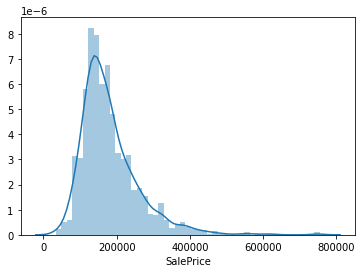

In [5]:
# Plot histogram
sns.distplot(df_train['SalePrice']);

*&#x201c;Ah! I see you that you use seaborn makeup when you're going out... That's so elegant! I also see that you:*

* *Deviate from the normal distribution.*
* *Have appreciable positive skewness.*
* *Show peakedness.*

*This is getting interesting! 'SalePrice', can you tell me your height?&#x201d;*

In [6]:
# Compute skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


*&#x201c;Amazing! If my love calculator is correct, our success probability is 97.834657%. I think we should meet again! Please, keep my number and give me a call if you're free next Friday. See you in a while, crocodile!&#x201d;*

## 'SalePrice', her buddies and her interests

*It is military wisdom to choose the terrain where you will fight. As soon as 'SalePrice' walked away, I went to Facebook (disclaimer: I was born in the 80s) and I found out that we have some friends in common. Besides Chuck Norris, we both know 'GrLivArea' and 'TotalBsmtSF'. Moreover, we also have some common interests such as 'OverallQual' and 'YearBuilt'. Accordingly, I decided to start by exploring the profiles of our friends in common, leaving the exploration of our common interests for later.*

### Relationship with numerical variables

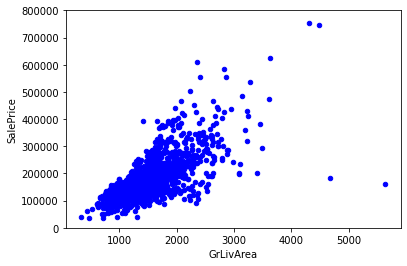

In [7]:
# Scatter plot GrLivArea/SalePrice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', c='blue', ylim=(0,800000));

*Hmmm... It seems that 'SalePrice' and 'GrLivArea' are longtime friends and that they have a __linear relationship__ *.

*And what about 'TotalBsmtSF'?*

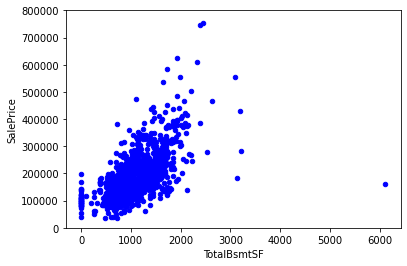

In [8]:
# Scatter plot TotalBsmtSF/SalePrice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', c='blue', ylim=(0,800000));

*'TotalBsmtSF' is also a great friend of 'SalePrice', but this seems to be a much more emotional relationship! Everything is ok and suddenly, due to a **strong linear (exponential?)** reaction, everything changes. Moreover, it's clear that sometimes 'TotalBsmtSF' closes in on himself and pays no attention to 'SalePrice'.*

### Relationship with categorical features

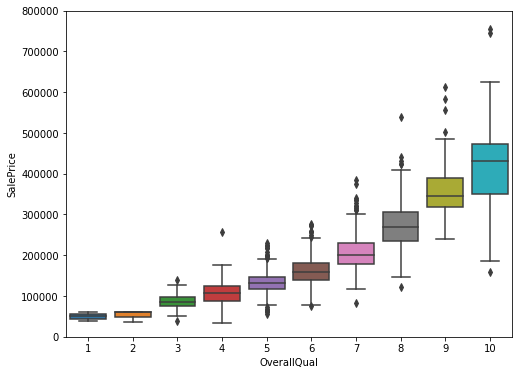

In [9]:
# Box plot OverallQual/SalePrice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

*'SalePrice' seems to enjoy 'OverallQual'. Note to self: consider whether fast food is suitable for the first date.*

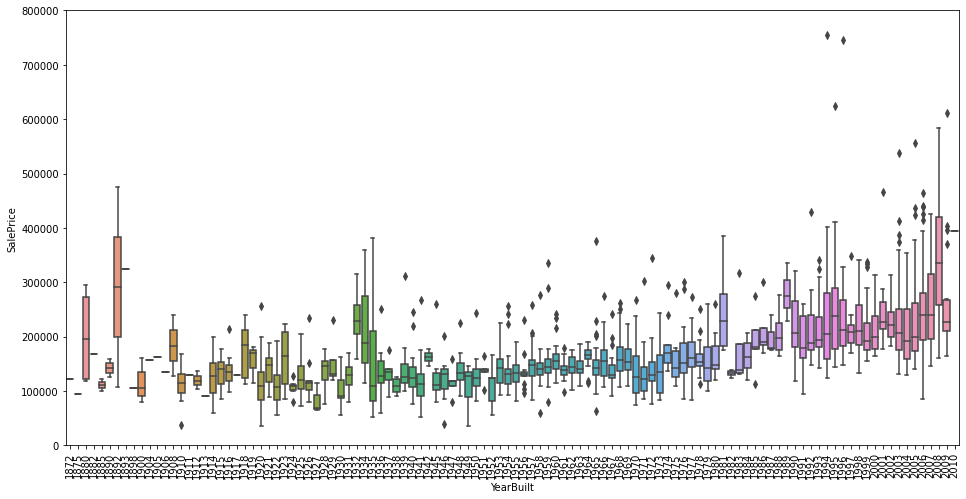

In [10]:
# Box plot YearBuilt/SalePrice
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90);

*Although it's not a strong tendency, I'd say that 'SalePrice' is more prone to spend more money in new stuff than in old relics.*

<b>Note</b>: we don't know if 'SalePrice' is in constant prices. Constant prices try to remove the effect of inflation. If 'SalePrice' is not in constant prices, it should be, so that prices are comparable over the years.

### Summary

Stories aside, we can conclude that:

* 'GrLivArea' and 'TotalBsmtSF' seem to have a linear relationship with 'SalePrice'. Both relationships are positive, which means that as one variable increases, the other one also increases. In the case of 'TotalBsmtSF', we can see that the slope of the linear relationship is particularly high.
* 'OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems to be stronger in the case of 'OverallQual', where the box plot shows how sales prices increase with increasing overall quality.

We just analyzed four variables (features), but there are many others that we could analyze. The trick here seems to be in the choice of the right features (feature selection) and not in the definition of complex relationships between them (feature engineering).

That said, let's separate the wheat from the chaff.

# 3. Keep calm and work smart

Until now, we just followed our intuition and analyzed the variables we thought were important. In spite of our efforts to give an objective character to our analysis, we must say that our starting point was subjective. 

As an engineer, I don't feel comfortable with this approach. All my education was about developing a disciplined mind, one that could be able to withstand the winds of subjectivity. There's a reason for that. Try to be subjective in structural engineering and you will see physics making things fall down. It can hurt.

So, let's overcome inertia and do a more objective analysis.

## The &#x201c;plasma soup&#x201d;

&#x201c;In the very beginning there was nothing except for a plasma soup. What is known of these brief moments in time, at the start of our study of cosmology, is largely conjectural. However, science has devised some sketch of what probably happened, based on what is known about the universe today.&#x201d; (*source*: [The Big Bang: It sure was BIG!!](http://umich.edu/~gs265/bigbang.htm)).

To explore the universe, we will start with some practical recipes to make sense of our &#x201c;plasma soup&#x201d;:
* Correlation matrix (heatmap style).
* 'SalePrice' correlation matrix (zoomed heatmap style).
* Scatter plots between the most correlated variables (move like Jagger style).

### Correlation matrix (heatmap style)

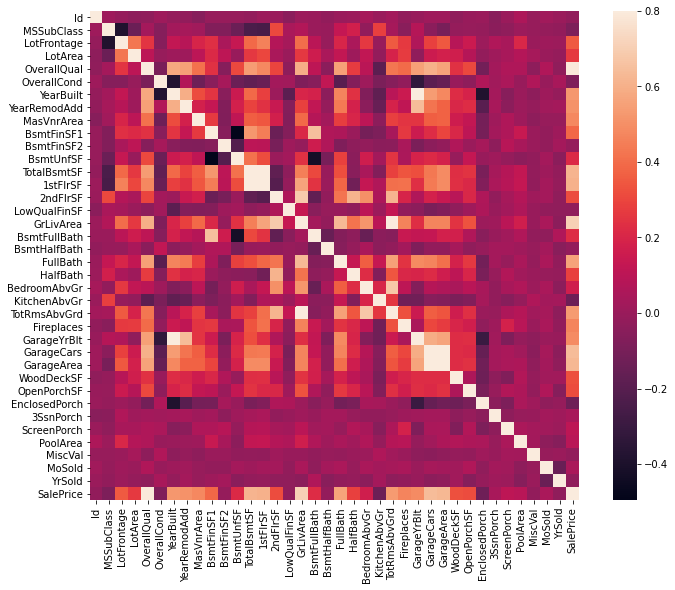

In [11]:
# Correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

This heatmap is the best way to get a quick overview of our &#x201c;plasma soup&#x201d;, as long as we are able to focus our attention on very light areas and very dark areas. It helps if you're a mutant with superhuman abilities, which is not my case.

However, at first glance, there are two white areas that get my attention. The first one refers to the 'TotalBsmtSF' and '1stFlrSF' variables, and the second one refers to the 'Garage*X*' variables. Both cases show how strong the correlation is between these variables. Actually, the correlation is so strong that it can indicate a multicollinearity situation. If we think about the meaning of these variables, we can realize that they give almost the same information. Thus, we probably are facing a multicollinearity situation.

Also, I took the opportunity to look at the 'SalePrice' correlations. As we can see, our well-known 'GrLivArea', 'TotalBsmtSF' and 'OverallQual' are there, giving us a big &#x201c;Hello!&#x201d;. But they are not alone. Other variables show a strong correlation (e.g., '1stFlrSF') and maybe we should invite them to the party too. Let's check.

### 'SalePrice' correlation matrix (zoomed heatmap style)

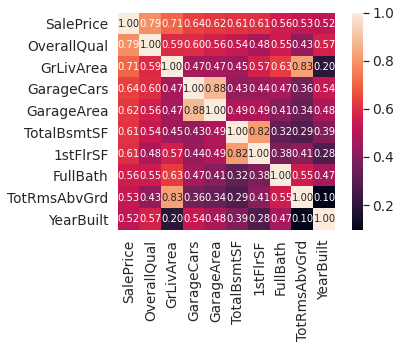

In [12]:
# SalePrice correlation matrix
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

According to our crystal ball, these are the variables whose correlation with 'SalePrice' is strongest. My two cents:

* **'OverallQual', 'GrLivArea', and 'TotalBsmtSF' are strongly correlated with 'SalePrice'**. Check!
* **'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables**. However, as we discussed previously, the number of cars that fit into the garage is a consequence of the garage area. 'GarageCars' and 'GarageArea' are like twin brothers. You'll never be able to distinguish them. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is stronger).
* **'TotalBsmtSF' and '1stFloor' also seem to be twin brothers**. We can keep 'TotalBsmtSF' just to say that our first guess was right (re-read section &#x201c;So... What can we expect?&#x201d;).
* **'FullBath' is relevant**. Really? 
* **'TotRmsAbvGrd' and 'GrLivArea', twin brothers again**. Is this data set from Chernobyl?
* **It seems that 'YearBuilt' is slightly correlated with 'SalePrice'**. Honestly, it scares me to think about 'YearBuilt' because I start feeling that we should do a little bit of time-series analysis to get this right. I'll leave this as a homework for you.

Let's move on to scatter plots.

### Scatter plots between 'SalePrice' and correlated variables (move like Jagger style)

Get ready for what comes next. I must confess that the first time I saw these scatter plots I was totally blown away. So much information in so little space... It's just amazing! Thank you [seaborn](https://seaborn.pydata.org/). You make me 'move like Jagger'!

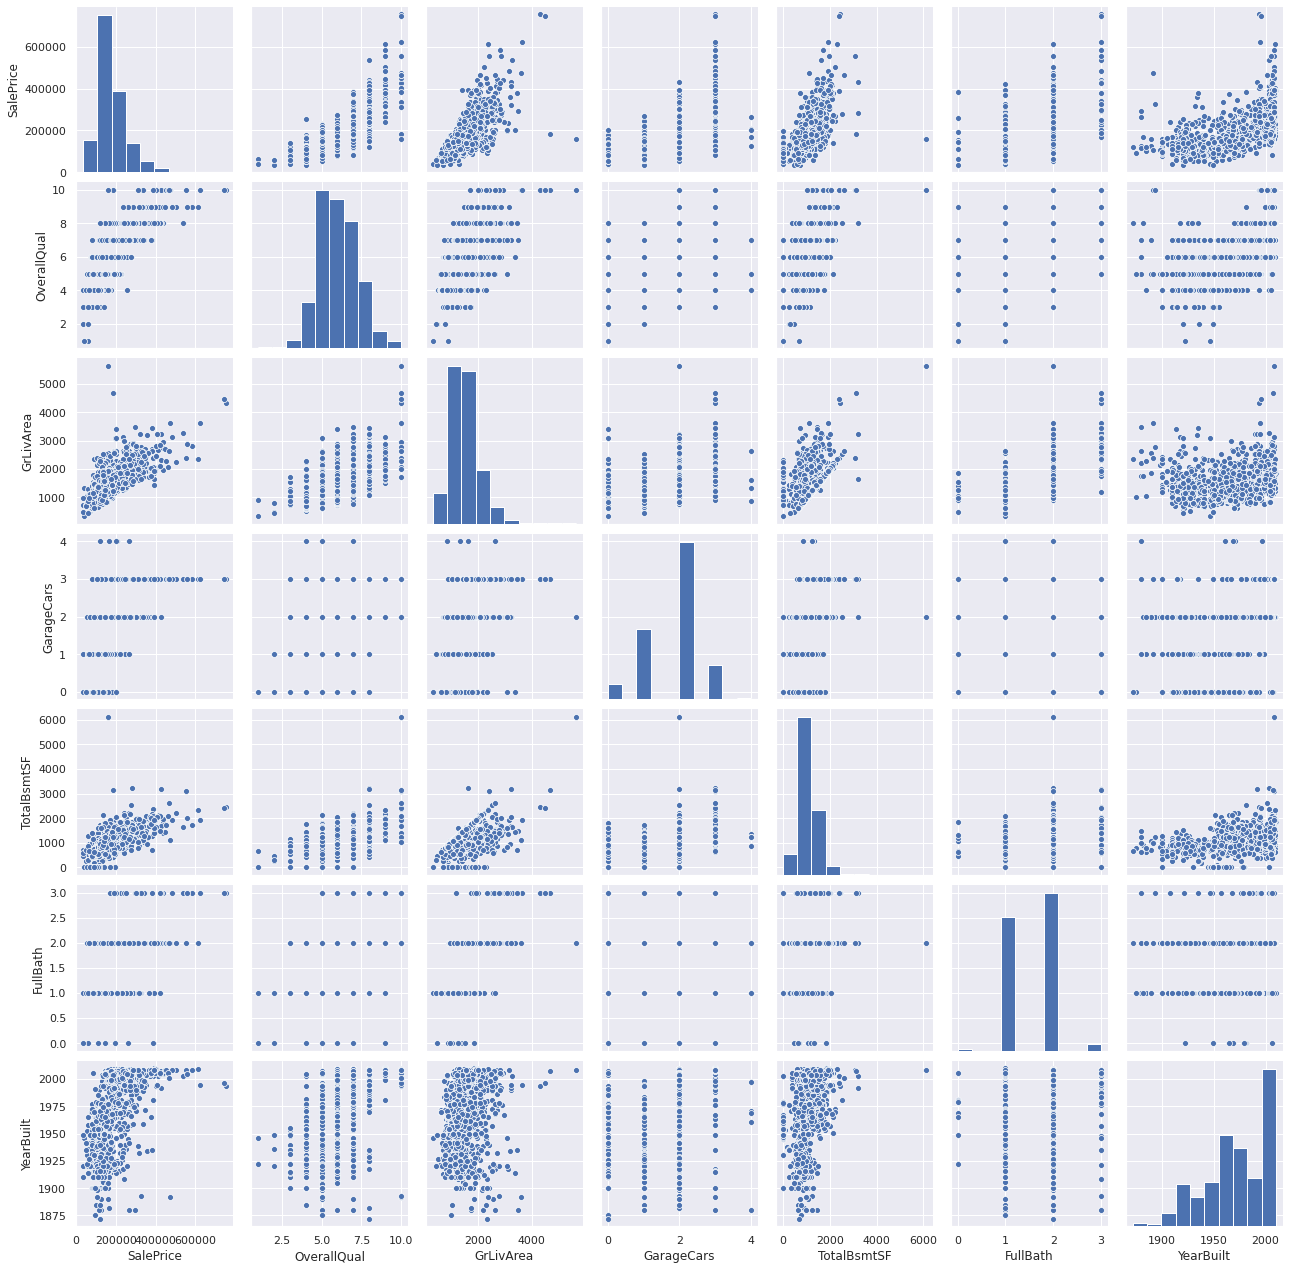

In [13]:
# Plot scatter plots
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

Although we already know some of the main figures, this mega scatter plot gives us a reasonable idea about the relationships between variables.

One of the figures that we may find interesting is the one between 'TotalBsmtSF' and 'GrLiveArea'. In this figure, we can see the points drawing a linear line, almost acting like a border. It makes sense that most of the points stay below this border. The basement area can be at least equal to the above grade area, but the basement area is not expected to be larger than the above grade area (unless we're talking about bunkers).

Another interesting plot is the one that relates 'YearBuilt' to 'SalePrice'. In the bottom of the &#x201c;points cloud&#x201d;, we can see what appears to be a shy exponential function (be creative). In the same fashion, we can see an exponential function in the upper limit of the &#x201c;points cloud&#x201d; (be even more creative). Finally, notice how the points related to the last few years tend to be above the lower limit and to break the upper limit (prices are increasing faster now as you may have noticed the last time you tried to buy a house).

Ok, enough of the Rorschach test for now. Let's move on to what's missing: data!

# 4. Missing data

Important questions when thinking about missing data:

* How significant is the missing data?
* Is the data missing at random or not?

The answer to these questions defines how we should deal with missing data. For example, if the missing data is not that significant, we can just delete all the observations that have missing data. However, this may not be a great solution if we are already lacking data. Also, if the data is not missing at random, to delete observations with missing data may bias our analysis. Thus, it's hard to define a 'one size fits all' approach for missing data. The best advice I can give you is to approach with a dash of common sense.

In [14]:
# Compute missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


I'll put my money where my mouth is and try to approach this missing data problem in the light of common sense. May the Force be with me!

We'll start by considering that when data of one variable is missing in more than 15% of the data set, that variable should be deleted (and we will pretend it never existed). Thus, we should delete a set of variables (e.g., 'PoolQC', 'MiscFeature', 'Alley'). Will we miss this data? I don't think so. None of these variables seem to be important, since most of them are not aspects in which we think about when we are buying a house (maybe that's the reason why data is missing, no?). Moreover, thinking a little bit more, we can realize that variables like 'PoolQC', 'MiscFeature', and 'FireplaceQu' are strong candidates to be outliers, which should reinforce our desire to eliminate them.

With regard to the remaining cases, we can see that 'Garage<i>X</i>' variables have the same amount of missing data. I bet missing data refers to the same set of observations (although I will not check it; it's just 5% and we should not spend 20$ in 5$ problems). Since the most important information regarding garages is expressed by 'GarageCars', and considering that we are just talking about 5% of missing data, I'll delete the mentioned 'Garage*X*' variables. The same logic applies to the 'Bsmt<i>X<i>' variables.

Regarding 'MasVnrArea' and 'MasVnrType', we can consider that these variables are not essential. Furthermore, they have a strong correlation with 'YearBuilt' and 'OverallQual', which are already considered. Thus, we will not lose information if we delete 'MasVnrArea' and 'MasVnrType'.

Finally, we have one missing observation in 'Electrical'. It is just one observation, so we'll delete this observation and keep the variable.

In summary, to handle missing data, we'll delete all the variables with missing data, except the variable 'Electrical'. In 'Electrical', we'll just delete the observation with missing data.

In [15]:
# Deal with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
print('Number of missing data cases: ',df_train.isnull().sum().max())

Number of missing data cases:  0


## Out liars!

Another important topic is outliers. Outliers are observations that are clearly different from other observations in the data set. It is important to identify outliers because they can affect our models and they can give us important insights about specific behaviors happening in the reality hiding behind our data set.

Outliers is a complex subject and it deserves more attention. Here, we'll just do a quick analysis using the standard deviation of 'SalePrice' and a set of scatter plots.

### Univariate analysis

The primary concern here is to establish a threshold that defines an observation as an outlier. To do so, we'll standardize the data set. In this context, data standardization means converting data values so that they have a mean of 0 and a standard deviation of 1.

In [16]:
# Standardize data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


How 'SalePrice' looks with her new clothes:

* Low range values are similar and not too far from 0.
* High range values are far from 0 and the 7.something values are out of range.

For now, we'll not consider any of these values as an outlier but we should be careful with those two 7.something values.

### Bivariate analysis

We already know the following scatter plots by heart. However, when we look to things from a new perspective, there's always something to discover. As Alan Kay said, &#x201c;a change in perspective is worth 80 IQ points.&#x201d; So, let's plot the plots.

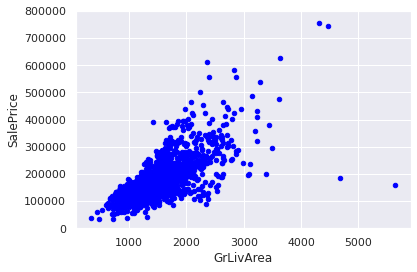

In [17]:
# Bivariate analysis GrLivArea/SalePrice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', c='blue', ylim=(0,800000));

Consequences of the new perspective:

* The two values with bigger 'GrLivArea' seem strange and they are not following the crowd. We can speculate why this is happening. Maybe they refer to agricultural area and that could explain the low price. I'm not sure about this but I'm quite confident that these two points are not representative of the typical case. Therefore, we'll define them as outliers and delete them (evil laugh).
* The two observations in the top of the plot are those 7.something observations that we said we should be careful about. They look like two special cases; however, they seem to be following the trend. For that reason, we will keep them (angelic laugh).

In [18]:
# Delete points
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

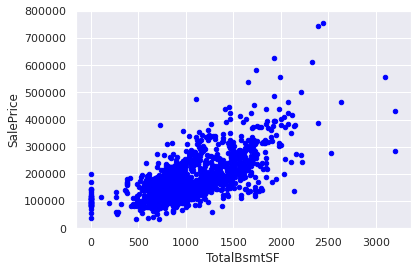

In [19]:
# Bivariate analysis TotalBsmtSF/SalePrice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', c='blue', ylim=(0,800000));

We can feel tempted to eliminate some observations (e.g., TotalBsmtSF > 3000) but I suppose it's not worth it. We can live with that, so let's keep moving.

# 5. Getting hard core

In Ayn Rand's novel, _Atlas Shrugged_, there is an often-repeated question: who is John Galt? A big part of the book is about the quest to discover the answer to this question.

I feel Randian now. Who is 'SalePrice'?

Testing the assumptions underlying the statistical bases for multivariate analysi is a step towards answering this question. We already discovered a lot about our data. Now, it's time to dig deeper and understand if our data complies with the statistical assumptions that enables us to apply multivariate techniques.

According to [Hair et al. (2013)](https://amzn.to/2uC3j9p), we must test four assumptions:

* **Normality** - Normality means that our data follows a normal distribution. This is important because several statistic tests rely  on this (e.g., t-statistics). In this exercise, we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Also, take into account that in big samples (>200 observations) normality may not be a problem. The point is that we avoid several issues (e.g., heteroscedacity) if we can ensure normality.

* **Homoscedasticity** - I just hope that I wrote it right. Homoscedasticity refers to the &#x201c;assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)&#x201d; [(Hair et al., 2013)](https://amzn.to/2uC3j9p). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

* **Linearity**- The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the important scatter plots we've seen appear to have linear relationships.

* **Absence of correlated errors** - Correlated errors, like the definition suggests, happen when one error is correlated to another one (wow). This is common in time series because some patterns are time related. We'll also not get into this. However, if you detect any problem, you can try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.

What do you think Elvis would say about this long explanation? 'A little less conversation, a little more action, please'? Probably... By the way, do you know what was Elvis's last great hit?

(...)

The bathroom floor.

### In the search for normality

The goal is to test 'SalePrice' in a very lean way. We'll do this, paying attention to:

* **Histogram** - Kurtosis and skewness.
* **Normal probability plot** - Data distribution should closely follow the diagonal that represents the normal distribution.

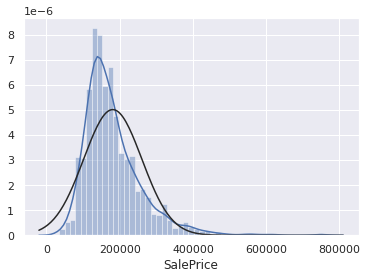

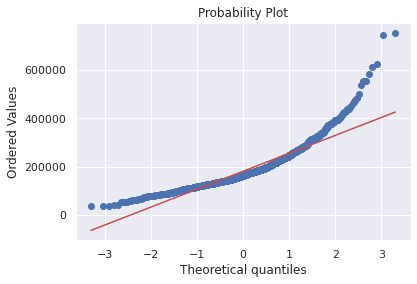

In [20]:
# Histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

Ok, 'SalePrice' is not normal. It shows 'peakedness', positive skewness, and does not follow the diagonal line.

But not everything is lost. A simple data transformation can solve the problem. This is one of the awesome things that you can learn in statistics books: in case of positive skewness, log transformations usually works well. When I discovered this, I felt like a Hogwarts' student discovering a new cool spell.



In [22]:
# Apply log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

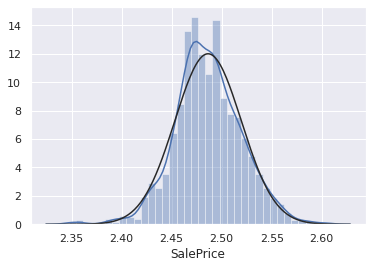

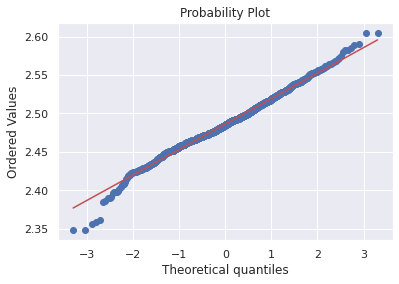

In [23]:
# Transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

Done! Let's check what's going on with 'GrLivArea'.

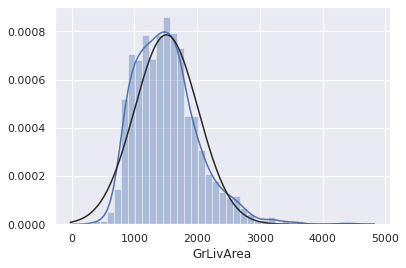

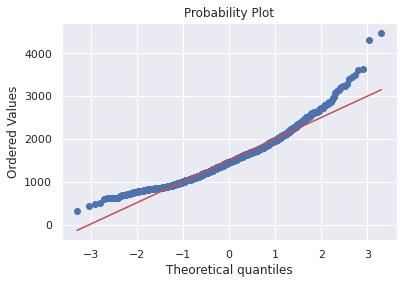

In [24]:
# Histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

Tastes like skewness... 

In [25]:
# Apply log transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

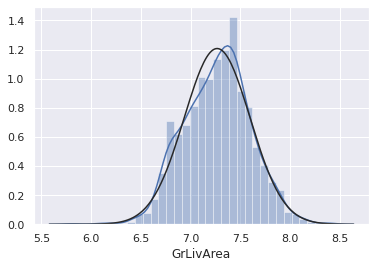

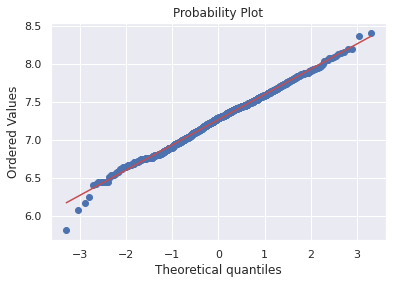

In [26]:
# Transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

Next, please...

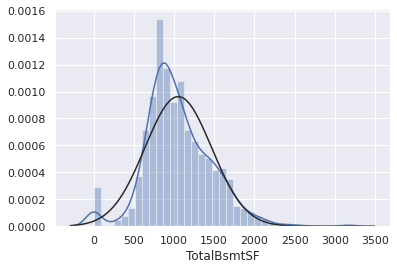

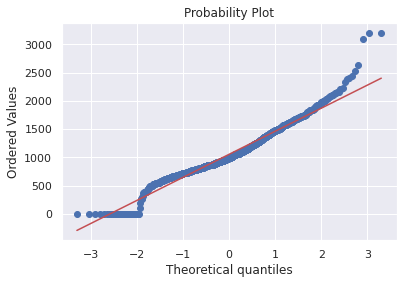

In [27]:
# Histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

Ok, now we are dealing with the big boss. What do we have here?

* Something that, in general, presents skewness.
* A significant number of observations are zero (houses without basement).
* A big problem because the value zero doesn't allow us to do log transformations.

To apply a log transformation here, we'll create a variable that can get the effect of having or not having a basement (binary variable). Then, we'll do a log transformation to all the non-zero observations, ignoring those with value zero. This way we can transform the data, without losing the effect of having or not having a basement.

I'm not sure if this approach is correct. It just seemed right to me. This is what I call &#x201c;high risk engineering.&#x201d;

In [28]:
# Create column for new variable (if area>0 it gets 1, for area==0 it gets 0)
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [29]:
# Apply log transformation
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

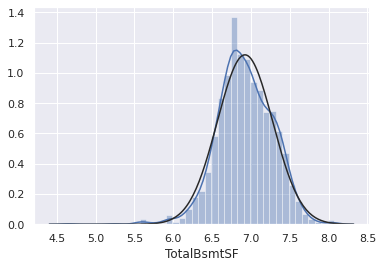

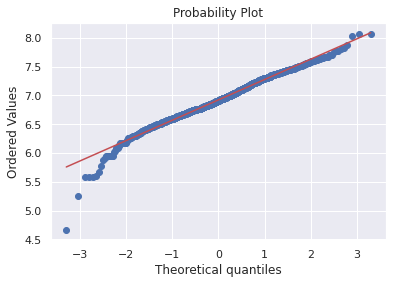

In [30]:
# Histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

### In the search for writing &#x201c;homoscedasticity&#x201d; right at the first attempt

We can test homoscedasticity in a visual way, using scatter plots. Departures from an equal dispersion are shown by such shapes as cones (small dispersion at one side of the graph, large dispersion at the opposite side), or diamonds (a large number of points at the center of the distribution).

Starting with 'GrLivArea' and 'SalePrice'...

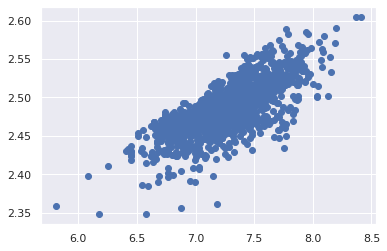

In [31]:
# Scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

Older versions of this scatter plot (previous to log transformations) had a conic shape (go back and check 'Scatter plots between 'SalePrice' and correlated variables [move like Jagger style]). As you can see, the current scatter plot doesn't have a conic shape anymore. That's the power of normality! Just by ensuring normality in some variables, we solved the homoscedasticity problem.

Now, let's check 'TotalBsmtSF' with 'SalePrice'.

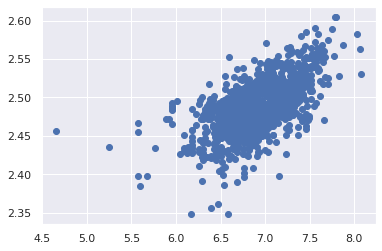

In [32]:
# Scatter plot
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);

In general, 'SalePrice' exhibits equal levels of variance across the range of 'TotalBsmtSF'. Cool!

# Last but not the least, dummy variables

Easy mode.

In [34]:
# Convert categorical variable into dummy
df_train = pd.get_dummies(df_train)
df_train.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0


# Conclusion

That's it! We've reached the end of our exercise.

Throughout this notebook, we tried to put into practice some of the strategies proposed by [Hair et al. (2013)](https://amzn.to/2uC3j9p). We philosophized about the variables, we analyzed 'SalePrice' alone and together with some of the variables with the highest correlation, we dealt with missing data and outliers, we tested some of the fundamental statistical assumptions, and we transformed categorial variables into dummy variables. That's a lot of work that Python made easier for us.

But the quest is not over. Remember that our story stopped in the Facebook research. Now, it's time to give a call to 'SalePrice' and invite her to dinner. Try to predict her behavior. Do you think she will enjoy regularized linear regression approaches? Or do you think she prefers ensemble methods? Or maybe something else?

It's up to you to find out.

# **References**
* [Hair, J.F., Black, W.C., Babin, B.J., Anderson, R.E. and Tatham, R.L., 2013. Multivariate data analysis (Vol. 5, No. 3, pp. 207-219). Upper Saddle River, NJ: Prentice hall.](https://amzn.to/2JuDmvo)